<a href="https://colab.research.google.com/github/Jhenry19-py/Options/blob/master/VanillaOptionClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.02


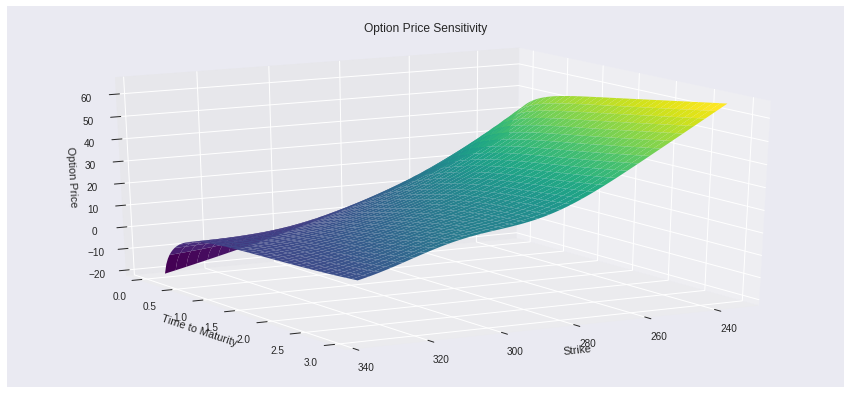

In [0]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import numpy as np


def Max(a, b):
    # return the greater of 2 numbers
    if a > b:
        return a
    else:
        return b

class VanillaOption():
    def __init__(self, S, K, T, sigma, r):
        self.S = S # underlying price
        self.K = K # strike price
        self.T = dt.datetime.strptime(T, "%m/%d/%Y").date() # time to maturity
        self.sigma = sigma # volatility
        self.r = r # risk-free rate 
    
    
class CallOption(VanillaOption):
    def payoff(self):
        """ This function calculates the payoff 
            of an option contract depending on whether 
            the option is a call option or a put option
        """

        return Max(self.S - self.K, 0)
    
    def Price(self):
        """ This function uses the Black-Scholes-Merton model to
            price a call option option contract given the attributes specified
            by the user. 
        """
        
        # time to expiry
        t = float((self.T - dt.date.today()).days) / 252 
        
        d1 = (np.log(self.S/self.K) + (self.r + self.sigma**2/2) * t) \
              / self.sigma * np.sqrt(t)
        d2 = d1 - self.sigma * np.sqrt(t)
        
        # Black-Scholes pricing formula
        C = self.S * norm.cdf(d1)  - norm.cdf(d2) * self.K \
            * np.exp(-self.r * t)
        
        if C < 0:
            return 0
        else:
            return float("%.2f" % C)
        
    def BSM4Plot(self, strike, ttm): 
        """ This function takes in an array of strike prices and 
            times to maturity and return an array of option prices 
            to be plotted for the visualize function below. 
        """
        d1 = (np.log(self.S/strike) + (self.r + self.sigma**2/2) * ttm) \
              / self.sigma * np.sqrt(ttm)
        d2 = d1 - self.sigma * np.sqrt(ttm)

        C = self.S * norm.cdf(d1) - norm.cdf(d2) * strike \
            * np.exp(-self.r * ttm)
        
        return C
        
    def visualize(self):
        """ Create a 3D plot of the option price against its Strike and
            Time to Expiry features. 
        """
        strikes = np.linspace(Max(self.K - 50, 0), self.K + 50, 100)
        ttm = np.linspace(0.01, 3, 100)
        strikes, ttm = np.meshgrid(strikes, ttm)
        Cs = self.BSM4Plot(strikes, ttm)
        
        fig = plt.figure(figsize=(15, 7))
        ax = plt.axes(projection='3d')
        ax.plot_surface(strikes, ttm, Cs, rstride=3, 
                   cstride=3, cmap='viridis')
        
        ax.set_xlabel('Strike')
        ax.set_ylabel('Time to Maturity')
        ax.set_zlabel('Option Price')
        ax.set_title('Option Price Sensitivity')
        
        ax.view_init(20, 60)
        
        plt.show()
        
        
class PutOption(VanillaOption):
    def payoff(self):
        """ This function calculates the payoff 
            of an option contract depending on whether 
            the option is a call option or a put option
        """

        return Max(self.K - self.S, 0)
    
    def Price(self):
        """ This function uses the Black-Scholes-Merton model to
            price a call option option contract given the attributes specified
            by the user. 
        """
        
        # time to expiry
        t = float((self.T - dt.date.today()).days) / 252 
        
        d1 = (np.log(self.S/self.K) + (self.r + self.sigma**2/2) * t) \
              / self.sigma * np.sqrt(t)
        d2 = d1 - self.sigma * np.sqrt(t)
        
        # Black-Scholes pricing formula
        P = self.K * np.exp(-self.r * t) * \
        norm.cdf(-d2) - self.S * norm.cdf(-d1) 
        
        if P < 0:
            return 0
        else:
            return float("%.2f" % P)
        
    def BSM4Plot(self, strike, vol): 
        """ This function takes in an array of strike prices and 
            times to maturity and return an array of option prices 
            to be plotted for the visualize function below. 
        """
        d1 = (np.log(self.S/strike) + (self.r + self.sigma**2/2) * ttm) \
              / self.sigma * np.sqrt(ttm)
        d2 = d1 - self.sigma * np.sqrt(ttm)

        P = strike * np.exp(-self.r * ttm) * \
        norm.cdf(-d2) - self.S * norm.cdf(-d1)
        
        return P
        
    def visualize(self):
        """ Create a 3D plot of the option price against its Strike and
            Time to Expiry features. 
        """
        strikes = np.linspace(Max(self.K - 50, 0), self.K + 50, 100)
        vol = np.linspace(0.01, 0.20, 100)
        strikes, ttm = np.meshgrid(strikes, ttm)
        Cs = self.BSM4Plot(strikes, ttm)
        
        fig = plt.figure(figsize=(15, 7))
        ax = plt.axes(projection='3d')
        ax.plot_surface(strikes, ttm, Cs, rstride=3, 
                   cstride=3, cmap='viridis')
        
        ax.set_xlabel('Strike')
        ax.set_ylabel('Time to Maturity')
        ax.set_zlabel('Option Price')
        ax.set_title('Option Price Sensitivity')
        
        ax.view_init(20, 60)
        
        plt.show()
    
    
SPY292CALL = CallOption(283.62, 285, '5/1/2019', 0.0933, 0.025)

print(SPY292CALL.Price())

SPY292CALL.visualize()
